In [1]:
import sql_py_defs as sql
import matplotlib.pyplot as plt
import numpy as np
import keyring
import os

In [2]:
pw = keyring.get_password("mysql", "ellaguise")
connection = sql.create_db_connection("localhost", "root", pw, "agn_samp")

MySQL Database connection successful


In [3]:
q1 = """
SELECT z,lum FROM agn_samp_z_5_area_10;
"""

results = sql.read_query(connection, q1)
z = [results[i][0] for i in range(len(results))]
lum = [results[i][1] for i in range(len(results))]

q2 = """
SELECT tau,sigma FROM agn_DRW_z_5_area_10;
"""

results = sql.read_query(connection, q2)
tau = [results[i][0] for i in range(len(results))]
sigma = [results[i][1] for i in range(len(results))]

alter_drw_table = """
ALTER TABLE agn_DRW_z_5_area_10 
  ADD mean_tau FLOAT NOT NULL,
  ADD std_tau FLOAT NOT NULL,
  ADD mean_sig FLOAT NOT NULL,
  ADD std_sig FLOAT NOT NULL
  ;
 """

#sql.execute_query(connection, alter_drw_table)

In [4]:
update_drw_table = '''
    UPDATE agn_DRW_z_5_area_10 
    SET mean_tau = %s, std_tau = %s, mean_sig = %s, std_sig = %s
    where id = %s
    '''

get_id = """
SELECT id FROM agn_samp_z_5_area_10 where z = (%s) AND lum = (%s);
"""

import glob
import re


for i in range(len(lum)):
    val = (float(z[i]), float(lum[i]))
    res = sql.read_query(connection, get_id, val)
    idx = res[0][0]
    test_file = "./jav_dats/fchain_lum_{}_z_{}_DRW_cad_DDF.dat".format(round(lum[i],6), round(z[i],6))
    if os.path.isfile(test_file):
        data = np.loadtxt(test_file)
        ln_t = [data[j][1] for j in range(len(data))]
        ln_s = [data[j][0] for j in range(len(data))]
        t = [np.log10(np.power(2.71828182846, ln_t[j])) for j in range(len(data))]
        s = [np.log10(np.power(2.71828182846, ln_s[j])) for j in range(len(data))]
        
        val = [(float(np.mean(t)), float(np.std(t)), float(np.mean(s)), float(np.std(s)), int(idx))]
        sql.execute_list_query(connection, update_drw_table, val)
        
        

(1.919028, 45.334423)
(3.336058, 44.366356)
(2.31645, 44.544262)
(1.335962, 45.545654)
(2.249493, 44.243137)
(4.135318, 44.490822)
(3.223514, 47.143375)
(0.491642, 45.458656)
(2.11006, 46.003834)
(1.806455, 46.641582)
(0.814679, 44.47773)
(2.432169, 44.237202)
(2.010218, 44.601627)
(0.975878, 44.660049)
(2.181334, 45.298267)
(2.005211, 45.649593)
(3.041678, 46.1814)
(1.34628, 44.745441)
(1.731911, 45.008694)
(1.557321, 44.393894)
(2.058251, 44.249207)
(1.685782, 44.789932)
(0.778466, 44.312881)
(4.45166, 44.21701)
(2.148614, 44.351772)
(2.036706, 44.145767)
(1.625354, 44.130802)
(0.372241, 44.239483)
(1.729305, 44.181576)
(2.463871, 44.445026)
(1.608561, 44.606564)
(1.333326, 44.216961)
(1.906994, 44.343521)
(2.118745, 44.374779)
(1.861498, 44.564678)
(1.453166, 44.592228)
(2.22432, 44.381092)
(3.630287, 44.644455)
(4.470416, 44.636189)
(4.853899, 44.334446)
(1.680921, 44.352947)
(3.949659, 45.020672)
(1.423897, 44.153004)
(1.274085, 44.117485)
(3.695097, 45.266235)
(1.687842, 44.18833

<ipython-input-4-dfe2b532be89>:33: RuntimeWarning: overflow encountered in power
  s = [np.log10(np.power(2.71828182846, ln_s[j])) for j in range(len(data))]
<ipython-input-4-dfe2b532be89>:33: RuntimeWarning: divide by zero encountered in log10
  s = [np.log10(np.power(2.71828182846, ln_s[j])) for j in range(len(data))]
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


(1.279603, 44.185863)
(1.032119, 45.854481)
(2.525501, 44.285049)
(1.370745, 45.204128)
(1.744031, 45.640675)
(0.856377, 45.124725)
(3.84108, 44.467205)
(1.646855, 45.457912)
(1.780164, 45.074108)
(1.653529, 44.468811)
(1.88466, 44.175323)
(2.339864, 45.586269)
(3.914876, 44.630276)
(2.438261, 44.213722)
(1.874944, 45.003098)
(3.426797, 46.535297)
(0.451405, 44.574162)
(4.7534, 45.012997)
(1.294162, 44.543861)
(2.236345, 45.862125)
(1.230644, 44.575375)
(0.987663, 45.646931)
(4.638457, 45.170345)
(4.733609, 44.308369)
(1.972053, 44.547459)
(4.733288, 44.189892)
(2.945533, 45.728222)
(2.817696, 45.177719)
(2.153015, 44.281555)
(1.476146, 44.556168)
(1.220444, 44.299126)
(1.654224, 45.045212)
(1.700563, 44.800373)
(4.917361, 44.105602)
(2.009921, 45.216988)
(2.640555, 46.074245)
(0.890649, 44.304142)
(2.808659, 45.377014)
(4.044045, 44.629417)
(1.692207, 44.527691)
(1.953102, 45.044678)
(4.233868, 44.484436)
(2.1926, 44.403496)
(1.554442, 44.875038)
(1.962645, 44.137493)
(2.197042, 44.55

(1.804623, 44.166416)
(1.383721, 44.494965)
(1.084688, 44.420738)
(1.415339, 44.609253)
(1.005531, 44.232365)
(0.66462, 44.261482)
(4.324042, 44.653168)
(1.670905, 45.100517)
(1.164197, 44.251484)
(0.915613, 44.258533)
(3.237184, 45.104214)
(1.516801, 45.293865)
(1.780154, 44.551224)
(2.162365, 44.118206)
(3.924377, 44.989445)
(2.11351, 44.358479)
(0.550789, 44.214794)
(2.179163, 44.721886)
(3.251517, 45.630276)
(2.724987, 45.070698)
(1.703234, 44.771049)
(1.925409, 45.438671)
(2.22499, 46.614655)
(3.629927, 45.16824)
(1.426298, 45.679176)
(2.198433, 45.496864)
(1.474271, 44.934795)
(0.801458, 44.37952)
(2.488352, 45.940903)
(2.101872, 44.53632)
(2.941173, 45.412395)
(2.588608, 44.337753)
(0.671182, 45.370613)
(3.152162, 46.299522)
(1.664494, 44.589706)
(1.662138, 44.588005)
(0.996049, 44.370018)
(3.172793, 44.359886)
(1.878395, 44.09935)
(1.132855, 44.559334)
(1.849502, 44.446754)
(3.3866, 45.129414)
(4.521993, 44.129848)
(2.730451, 44.631737)
(0.953892, 44.702454)
(2.196227, 44.50020

(1.635177, 44.663414)
(1.298158, 46.098866)
(1.246958, 45.606525)
(1.066472, 45.268471)
(4.224126, 44.832035)
(4.078916, 45.206314)
(1.421325, 44.313148)
(0.912497, 44.554855)
(3.638717, 44.428165)
(2.623405, 44.154545)
(1.091706, 44.558163)
(2.218538, 45.206841)
(1.424266, 44.730831)
(3.691021, 45.655437)
(1.943327, 44.924355)
(2.133493, 44.12677)
(2.573085, 44.544575)
(2.087842, 44.457066)
(2.130049, 46.016148)
(4.76214, 44.502808)
(2.254946, 45.348022)
(4.163296, 44.933105)
(0.70639, 44.475334)
(1.955916, 44.714645)
(3.930553, 44.634499)
(2.042068, 44.378262)
(4.98465, 44.741798)
(1.716563, 45.416168)
(3.938875, 44.523792)
(4.487774, 44.523533)
(1.251271, 44.209579)
(2.496405, 46.885166)
(2.431716, 44.18935)
(2.954602, 44.101055)
(1.683073, 44.429874)
(1.757283, 45.016827)
(1.228945, 45.465591)
(1.98035, 44.706715)
(3.532026, 44.151176)
(2.047486, 44.284973)
(4.485231, 44.561852)
(4.066851, 45.209438)
(1.503134, 44.488525)
(1.567832, 45.5322)
(3.302567, 46.195141)
(1.884312, 44.5122

(4.17445, 44.622952)
(1.803819, 45.381653)
(1.642363, 44.457031)
(2.395376, 45.193283)
(3.905283, 44.266094)
(4.305973, 44.432529)
(4.498744, 44.695824)
(4.591629, 45.031021)
(2.925535, 46.4002)
(0.958844, 44.805099)
(1.879841, 44.76342)
(1.899044, 44.641701)
(1.744616, 44.436676)
(2.132641, 44.415844)
(2.098719, 44.250313)
(0.819369, 45.545174)
(1.301751, 44.562771)
(1.361508, 44.261135)
(1.515752, 44.457043)
(1.56989, 45.028343)
(0.935854, 44.361103)
(1.789173, 45.799549)
(1.331908, 44.836777)
(2.1775, 45.406158)
(2.006381, 44.597431)
(1.74587, 45.63916)
(3.615225, 44.843189)
(1.080731, 45.241783)
(3.019474, 45.80368)
(1.023883, 44.835167)
(4.334731, 46.348488)
(1.034747, 44.121311)
(3.679926, 44.368359)
(1.045536, 44.483063)
(2.147662, 46.456478)
(2.819263, 44.165218)
(2.494764, 45.607147)
(1.909212, 44.609592)
(1.327034, 44.164059)
(2.074302, 44.126621)
(1.900422, 44.378101)
(1.313011, 44.12619)
(3.742537, 44.970501)
(1.732316, 44.436161)
(1.707772, 44.282238)
(1.853291, 44.572903)

(1.69452, 44.199654)
(1.495324, 44.264812)
(2.16494, 44.90073)
(2.03257, 44.099445)
(1.560264, 45.074238)
(1.351719, 44.832802)
(1.563509, 44.592793)
(1.853924, 45.307899)
(4.373418, 44.823673)
(2.925141, 45.666302)
(3.946837, 44.313629)
(4.147533, 44.31921)
(1.795055, 44.674473)
(0.837963, 44.301846)
(1.682439, 46.45343)
(1.383512, 44.470581)
(1.886551, 44.510319)
(2.466025, 46.168392)
(2.984992, 44.992359)
(1.642175, 45.143845)
(2.782236, 45.180794)
(3.746909, 44.795052)
(0.556319, 44.50024)
(2.088415, 46.255058)
(2.531203, 45.498741)
(1.499517, 44.878647)
(2.201383, 45.176853)
(3.914875, 44.212944)
(1.097488, 44.390011)
(1.345179, 45.766537)
(1.827059, 44.467194)
(1.536793, 44.836266)
(0.958221, 45.220249)
(2.161017, 44.648705)
(1.113302, 44.537994)
(1.17258, 44.270004)
(1.698172, 44.915199)
(4.549196, 45.155437)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(2.595447, 44.463787)
(2.044732, 44.099621)
(3.663588, 44.466583)
(2.534959, 47.293964)
(3.639307, 44.205891)
(2

(4.989922, 45.032402)
(2.921417, 44.551739)
(0.751615, 44.424709)
(1.043572, 44.099491)
(2.11663, 46.373795)
(1.171262, 44.257179)
(1.513849, 45.927471)
(1.969287, 44.54549)
(2.475509, 46.348549)
(1.251524, 44.721153)
(1.845464, 44.119053)
(1.574861, 44.303696)
(3.64903, 44.615849)
(4.377744, 44.575272)
(1.338736, 45.603001)
(3.162865, 44.34502)
(1.599245, 45.569916)
(2.188439, 45.411686)
(4.756094, 44.962585)
(1.728129, 44.700199)
(4.802076, 44.518322)
(4.566221, 44.223263)
(1.823648, 44.179951)
(0.943052, 44.975426)
(2.488311, 44.106441)
(2.107427, 45.748573)
(1.588418, 44.751289)
(1.605689, 44.269119)
(1.0611, 44.792694)
(2.895414, 44.112156)
(2.090308, 44.186859)
(1.551163, 44.542286)
(0.991333, 45.214428)
(2.273207, 45.135105)
(2.19945, 44.252983)
(1.299048, 44.793159)
(0.77776, 45.282333)
(1.96229, 45.084156)
(4.570786, 44.310379)
(0.651938, 44.488361)
(2.126195, 45.063087)
(2.00909, 44.997616)
(1.604558, 44.56665)
(3.031027, 45.972828)
(1.881755, 45.24855)
(2.789082, 45.172562)


(1.083527, 45.053848)
(0.732955, 44.495056)
(4.881094, 44.197292)
(2.634516, 44.619843)
(0.610467, 44.555817)
(1.840211, 45.780994)
(2.058018, 44.677288)
(1.945102, 44.97435)
(1.873367, 44.88731)
(2.549766, 44.126438)
(1.718043, 44.997887)
(2.145352, 44.358192)
(1.744611, 44.581928)
(4.039332, 45.067253)
(2.219688, 44.247696)
(2.851981, 45.590015)
(1.511357, 45.476517)
(4.342482, 45.749084)
(2.171477, 45.475876)
(1.856335, 44.878208)
(2.27524, 44.254379)
(1.58099, 44.84602)
(2.212471, 44.836712)
(4.34698, 45.147629)
(2.110982, 44.36116)
(2.11131, 44.103867)
(1.030226, 45.505405)
(2.277788, 45.406864)
(1.334444, 45.985161)
(2.02431, 44.241241)
(1.876035, 46.729637)
(0.585384, 44.401997)
(4.444828, 44.112034)
(1.47367, 44.507156)
(3.578317, 45.961475)
(1.895443, 46.017384)
(2.036039, 45.961018)
(2.364464, 44.286552)
(2.558288, 45.145458)
(1.785852, 45.195454)
(2.149556, 45.087486)
(2.043045, 45.628513)
(1.793548, 45.535076)
(3.666691, 45.650547)
(1.808287, 44.279224)
(1.206623, 44.718403

(1.05439, 44.381348)
(4.128582, 44.167629)
(1.280362, 44.304352)
(1.627622, 44.391163)
(1.286507, 44.744728)
(1.176079, 44.70396)
(1.865749, 44.893024)
(2.077938, 44.47517)
(2.955075, 44.45052)
(1.796084, 45.015713)
(2.095037, 44.696575)
(1.731414, 44.688015)
(2.249909, 46.48518)
(1.080368, 44.432743)
(3.933182, 45.553375)
(0.546074, 44.217991)
(1.137062, 44.72876)
(1.9791, 44.320194)
(4.958568, 44.289848)
(1.623577, 44.293568)
(4.805151, 44.173916)
(3.160198, 46.65617)
(4.723646, 45.72493)
(1.901324, 45.081036)
(2.587364, 44.365486)
(1.048565, 44.464272)
(3.621667, 45.600159)
(3.772077, 44.629147)
(3.942455, 45.020725)
(2.131026, 45.431942)
(2.758333, 45.919216)
(2.170128, 45.428169)
(3.038142, 44.347595)
(1.312914, 44.313416)
(1.943415, 45.521545)
(1.677187, 44.260639)
(1.663939, 44.42165)
(0.954109, 45.650898)
(1.569632, 46.258133)
(4.471574, 44.565968)
(1.53861, 44.657196)
(0.823098, 44.247665)
(0.835845, 45.059113)
(0.93841, 44.87645)
(2.066286, 45.856579)
(0.990663, 45.093861)
(1

(2.538965, 45.445164)
(1.760317, 44.653458)
(2.736228, 44.368904)
(0.532922, 45.113834)
(2.16111, 45.474621)
(3.574735, 44.885319)
(4.177199, 45.469273)
(2.056365, 44.105785)
(2.38628, 45.995701)
(2.934441, 44.681419)
(1.652579, 44.608017)
(2.003501, 44.23814)
(2.945933, 46.838814)
(1.938482, 45.175121)
(1.790254, 45.746208)
(2.318666, 45.533043)
(1.388843, 44.234219)
(2.31836, 44.866268)
(1.873086, 44.546677)
(2.464898, 44.468487)
(1.157302, 44.348057)
(1.43281, 44.334446)
(1.992021, 44.570072)
(2.461741, 44.251999)
(3.712202, 45.139488)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(1.573304, 44.714539)
(1.133826, 44.746532)
(1.661546, 44.809364)
(1.429193, 44.963097)
(3.28499, 44.740711)
(1.95244, 44.817314)
(2.434867, 44.477863)
(3.134176, 44.826256)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(0.90082, 44.454685)
(1.043392, 45.959049)
(1.658816, 45.413136)
(2.327324, 45.247356)
(2.017768, 44.736614)
(2.807198, 44.991001)
(3.058264, 45.991966)
(3.64786

(3.628031, 45.621193)
(1.697015, 44.427425)
(3.983662, 44.11615)
(1.784881, 44.670235)
(2.494814, 44.889126)
(2.287412, 44.212585)
(0.763216, 44.835781)
(2.044619, 45.132534)
(2.039055, 44.342403)
(3.640603, 44.85722)
(1.553479, 44.303192)
(4.2496, 44.717358)
(2.174907, 45.185493)
(2.968159, 46.158703)
(2.543846, 44.868881)
(0.823092, 45.368698)
(1.94504, 45.287823)
(2.095986, 44.119759)
(1.387604, 44.409073)
(1.21971, 44.200848)
(1.451039, 44.527534)
(0.941366, 45.142414)
(1.732511, 44.696846)
(4.086555, 46.249691)
(2.17187, 45.946426)
(2.216168, 46.631737)
(2.395976, 45.686531)
(4.411254, 44.269722)
(0.849138, 44.860748)
(4.057086, 44.599884)
(1.855268, 44.429035)
(1.616891, 44.572933)
(1.180644, 44.12331)
(1.044371, 45.086823)
(1.67549, 44.297104)
(1.64672, 44.109146)
(0.588572, 44.145634)
(0.481013, 44.820778)
(1.557939, 45.014977)
(0.88748, 45.236477)
(2.334543, 45.935452)
(2.081982, 44.675156)
(0.874184, 45.297916)
(0.779581, 44.279694)
(3.608865, 44.610973)
(2.081789, 44.2533)
(

(1.514208, 44.340759)
(2.311228, 44.951534)
(1.352922, 44.202091)
(1.678731, 45.73801)
(1.272066, 44.791866)
(1.805235, 44.691444)
(1.294582, 44.232628)
(1.912547, 45.042751)
(1.90053, 44.524323)
(3.907854, 44.275509)
(1.978505, 44.494408)
(1.085346, 44.903046)
(2.126409, 44.29911)
(1.494498, 44.307278)
(2.177617, 44.51601)
(1.9408, 45.530838)
(4.633606, 44.556396)
(0.477807, 44.171108)
(3.544621, 45.303543)
(4.342869, 45.491982)
(2.494955, 44.392296)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(1.814994, 45.162159)
(2.720742, 45.328434)
(1.700368, 45.892155)
(1.60576, 44.668968)
(1.754606, 45.642204)
(0.726237, 45.074986)
(4.080969, 44.994881)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(2.618954, 44.599499)
(1.422713, 44.975967)
(4.329067, 45.631882)
(3.611145, 44.517151)
(4.547256, 45.256523)
(1.021658, 45.339314)
(0.753067, 44.128506)
(3.59407, 44.758816)
(1.999313, 44.486328)
(2.129447, 44.340374)
(4.094975, 45.981091)
(1.505636, 44.245998)
(3.78590

(3.508432, 45.326836)
(0.892588, 44.701382)
(1.856399, 44.27235)
(0.844676, 44.286049)
(2.433014, 44.530605)
(2.056634, 44.149117)
(2.473476, 46.242531)
(2.138939, 44.651035)
(3.190579, 46.546921)
(1.948708, 45.135353)
(2.307593, 44.141384)
(2.503957, 44.416981)
(2.348045, 44.809319)
(1.226073, 44.266438)
(1.956806, 44.15033)
(3.005415, 46.907173)
(4.521853, 44.961163)
(1.167925, 44.90369)
(1.636438, 44.371235)
(2.063719, 44.255173)
(0.62921, 44.417171)
(2.001392, 44.113644)
(2.121763, 44.581097)
(2.145215, 44.203564)
(3.144167, 45.069489)
(4.097622, 45.261616)
(1.198538, 45.794052)
(1.954928, 44.596016)
(2.448991, 44.491016)
(1.932693, 44.547695)
(1.699055, 44.350227)
(2.856438, 44.543827)
(4.512446, 44.610771)
(2.842905, 45.286816)
(3.611333, 44.946392)
(2.900247, 46.279598)
(2.501397, 44.98222)
(0.53753, 44.890209)
(0.829305, 45.046921)
(2.710152, 44.597912)
(1.667856, 45.193546)
(3.031978, 46.064308)
(3.681797, 45.829639)
(2.857225, 44.536217)
(1.665882, 45.840214)
(1.250777, 46.75

(2.570638, 45.785534)
(1.556412, 45.499168)
(0.578009, 44.777695)
(2.164854, 44.645599)
(3.78847, 44.715561)
(1.633895, 45.288799)
(3.75711, 45.796139)
(2.161298, 45.366985)
(1.44498, 45.463924)
(0.569273, 44.108536)
(2.02051, 44.359871)
(2.263998, 44.367321)
(1.772912, 44.604736)
(2.178931, 44.860931)
(1.697548, 45.554676)
(0.709502, 45.188255)
(1.626504, 44.444878)
(2.21331, 44.791306)
(3.486127, 47.040024)
(1.286471, 45.834846)
(1.993457, 44.596752)
(2.188054, 44.565796)
(2.499569, 44.895557)
(1.874156, 44.45467)
(2.438993, 46.596497)
(1.85964, 46.313873)
(2.263519, 46.188068)
(1.84595, 44.529385)
(2.076818, 44.520805)
(0.976134, 44.345745)
(1.847899, 45.601593)
(1.037755, 44.714355)
(1.998375, 44.112728)
(2.785437, 45.008423)
(2.146315, 46.163506)
(1.527643, 44.111027)
(1.862741, 44.809601)
(2.819344, 44.613937)
(4.707762, 45.124462)
(1.528916, 45.594948)
(1.567201, 44.947346)
(3.080562, 44.374397)
(2.015466, 45.60107)
(1.001203, 44.731541)
(2.619152, 45.220524)
(1.726316, 44.48960

<ipython-input-4-dfe2b532be89>:32: RuntimeWarning: overflow encountered in power
  t = [np.log10(np.power(2.71828182846, ln_t[j])) for j in range(len(data))]
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


(1.316811, 44.638729)
(0.908452, 44.391594)
(4.190058, 44.252464)
(2.541107, 44.511894)
(2.307591, 45.144806)
(2.031192, 45.617332)
(1.724766, 44.118923)
(1.667355, 44.195759)
(3.411, 45.272503)
(0.633938, 44.376743)
(1.768039, 44.331776)
(4.271635, 45.573082)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(2.143648, 44.317883)
(0.2115, 44.217766)
(3.424026, 44.102581)
(1.699099, 46.394939)
(2.998184, 45.473045)
(1.932103, 45.24054)
(2.258893, 44.492863)
(2.912313, 45.275558)
(2.04328, 44.183327)
(2.319506, 44.574493)
(0.419716, 45.06876)
(2.880038, 44.641476)
(4.82094, 45.280556)
(1.505969, 44.553837)
(1.845304, 44.267712)
(1.56421, 44.355377)
(0.998056, 45.17799)
(3.474216, 44.335747)
(2.505253, 45.667439)
(1.834161, 44.863506)
(2.329515, 45.445915)
(2.047704, 44.259212)
(1.839912, 46.12735)
(2.06263, 44.10651)
(3.706991, 44.282082)
(3.543184, 44.620041)
(0.700835, 44.251549)
(4.563955, 44.434555)
(1.8753, 44.38113)
(3.557895, 44.130089)
(1.739487, 45.49284)
(4.641675, 4

(0.615903, 44.454559)
(2.079583, 44.698021)
(2.223607, 44.950039)
(1.546431, 46.835037)
(2.059239, 44.255623)
(1.767742, 44.800793)
(4.634786, 44.734215)
(2.653249, 44.671158)
(1.562614, 45.240086)
(2.130387, 44.22485)
(2.093747, 45.841515)
(2.373164, 44.531212)
(2.107032, 45.182312)
(1.627948, 44.292358)
(1.812224, 44.851646)
(0.660086, 44.345112)
(2.827278, 45.579945)
(1.547783, 44.111526)
(1.427673, 44.158283)
(1.759126, 44.92194)
(2.123786, 45.320435)
(2.167785, 46.623734)
(1.546442, 44.162834)
(1.810914, 44.408623)
(1.618229, 44.753078)
(4.054488, 44.374046)
(1.818087, 44.644299)
(2.345266, 46.547169)
(2.109182, 44.895756)
(2.584698, 44.907112)
(1.525514, 44.725094)
(2.7481, 45.869907)
(1.082112, 44.334438)
(2.038966, 46.591896)
(1.292585, 45.810268)
(1.987645, 45.139793)
(2.056298, 44.263485)
(4.948799, 45.181629)
(1.456875, 45.316624)
(1.273825, 45.688335)
(3.964269, 44.901398)
(1.475885, 44.519531)
(1.701194, 45.689701)
(4.864233, 45.409023)
(1.554788, 44.84222)
(4.295063, 44.3

(3.274517, 45.005009)
(3.886346, 44.647053)
(1.584074, 44.110729)
(2.282918, 44.20623)
(1.243728, 45.71476)
(0.892663, 45.482422)
(0.73434, 45.209)
(4.200697, 45.289303)
(4.278052, 44.239662)
(1.745392, 44.854126)
(4.462086, 44.953339)
(2.347741, 45.129143)
(1.299545, 44.875797)
(1.567745, 44.237522)
(2.193173, 44.152843)
(2.171722, 45.620632)
(1.402708, 44.214706)
(2.348652, 44.432545)
(1.656375, 44.568577)
(1.35421, 44.27523)
(1.510076, 46.256111)
(2.1836, 44.672382)
(2.075054, 44.399063)
(1.235749, 44.16671)
(0.746024, 44.612877)
(1.089162, 44.10503)
(4.645677, 44.445126)
(4.38194, 45.634247)
(1.757913, 44.260357)
(2.000941, 46.053616)
(1.222247, 44.623466)
(2.735806, 44.349148)
(2.060814, 44.123535)
(1.712505, 44.514645)
(2.069488, 44.67271)
(2.364914, 45.999718)
(0.880688, 45.164604)
(1.662039, 44.111221)
(2.016899, 44.416904)
(1.982191, 44.196243)
(4.299985, 44.160988)
(3.513967, 45.766174)
(0.672603, 44.959553)
(1.228156, 45.201157)
(3.015705, 46.672413)
(3.478637, 44.315205)
(1

(1.85697, 45.443584)
(2.424938, 44.134331)
(2.178856, 44.232597)
(1.195366, 44.160046)
(2.477216, 44.624008)
(1.57407, 45.243996)
(1.989011, 45.565868)
(2.07932, 44.442169)
(2.69409, 44.468849)
(2.287423, 44.383675)
(3.727568, 44.788185)
(2.511116, 45.145172)
(1.322951, 44.498882)
(1.496028, 45.438641)
(1.612299, 44.590153)
(2.13369, 46.124908)
(1.634096, 44.123589)
(1.124473, 44.97406)
(1.643752, 44.847794)
(1.434908, 44.766499)
(1.569845, 45.462055)
(2.44515, 44.665131)
(2.05475, 45.436302)
(1.920848, 44.249149)
(3.833005, 44.590168)
(1.869945, 44.42276)
(1.770942, 44.344456)
(2.250917, 45.006935)
(3.258802, 44.212509)
(1.478333, 44.430511)
(0.544737, 45.388256)
(2.132609, 44.497837)
(1.712748, 44.797855)
(2.590128, 44.614433)
(1.447871, 44.269062)
(2.045552, 45.292271)
(0.355658, 45.004108)
(2.189036, 45.059105)
(2.594377, 44.15831)
(2.423954, 46.889294)
(2.184062, 44.335014)
(4.352445, 45.407867)
(4.626831, 45.20697)
(1.849161, 45.017956)
(1.536072, 44.444916)
(0.478226, 44.14669)


(3.583196, 44.801575)
(2.290318, 44.77417)
(3.273989, 45.266777)
(2.712652, 46.711319)
(2.025525, 44.617687)
(1.977824, 44.323116)
(3.912181, 44.404552)
(2.042624, 44.424896)
(1.777769, 44.814991)
(0.808826, 44.206371)
(2.090671, 45.067932)
(3.848325, 44.582775)
(4.487921, 44.566589)
(2.16021, 44.410603)
(0.814675, 44.125565)
(4.413433, 44.568485)
Error: '1054 (42S22): Unknown column 'nan' in 'field list''
(2.786778, 45.039341)
(1.895754, 44.40757)
(1.806847, 45.333874)
(2.347221, 45.97015)
(1.922872, 45.391819)
(2.152569, 44.318214)
(4.16607, 44.53072)
(1.971533, 46.093166)
(2.013054, 44.811398)
(2.992443, 44.682964)
(1.924577, 44.128963)
(0.598313, 45.227425)
(2.496418, 44.294544)
(2.558169, 44.92017)
(3.913406, 45.770348)
(2.450967, 45.229771)
(4.729657, 45.179443)
(1.161873, 44.711983)
(1.963163, 46.391727)
(0.892123, 44.296108)
(3.134987, 45.058327)
(4.702615, 45.295101)
(1.932718, 44.4953)
(1.595185, 45.061481)
(1.810397, 45.631153)
(0.897932, 45.420826)
(1.427148, 46.763401)
(2.

(3.816125, 45.422829)
(3.983191, 45.260975)
(2.38325, 46.400723)
(3.072342, 44.43354)
(4.323302, 45.115803)
(1.074758, 44.165451)
(1.589055, 45.249321)
(2.123104, 45.685932)
(1.244617, 44.69698)
(1.567702, 44.387501)
(2.431212, 44.943481)
(1.983162, 45.538811)
(1.316627, 44.875954)
(1.431788, 45.683327)
(2.241679, 45.784019)
(1.258505, 44.663776)
(1.227918, 46.135353)
(1.976422, 44.543575)
(1.463509, 45.247478)
(1.40422, 45.757774)
(2.171992, 45.071056)
(2.200663, 45.590477)
(2.714927, 44.76368)
(1.10544, 44.432701)
(1.29435, 44.433186)
(0.545294, 44.827595)
(1.699736, 44.202141)
(2.209167, 44.14397)
(2.095424, 44.632366)
(1.837687, 44.319508)
(3.255307, 44.228249)
(1.663874, 44.334797)
(2.12803, 45.268211)
(3.849601, 45.520966)
(4.19053, 45.443981)
(1.374023, 44.442055)
(2.026507, 45.006927)
(1.452476, 44.435345)
(1.717837, 44.858452)
(3.254396, 45.836487)
(2.018494, 44.197758)
(2.057842, 45.834442)
(3.96218, 44.606636)
(2.001585, 45.239017)
(2.881247, 44.4412)
(2.934129, 45.886913)
(

(2.550691, 44.645027)
(3.666653, 44.413773)
(1.637026, 45.435925)
(1.807141, 46.346188)
(1.07224, 44.673981)
(2.236041, 44.787434)
(2.208088, 44.810635)
(1.841757, 44.121105)
(2.541548, 44.409698)
(1.468997, 44.309303)
(2.600064, 45.685455)
(1.829462, 44.696377)
(1.371151, 45.493797)
(1.631077, 44.118446)
(1.421284, 44.836571)
(2.601758, 44.328602)
(1.054093, 45.376728)
(0.606699, 45.554924)
(1.658152, 44.149212)
(2.813251, 44.983273)
(0.962026, 44.149948)
(4.932046, 44.50481)
(1.679051, 45.116802)
(2.224161, 46.136341)
(1.693396, 44.473595)
(2.511793, 44.153172)
(1.153643, 44.856701)
(2.509002, 45.237869)
(3.554364, 45.516018)
(2.127722, 45.140892)
(1.677899, 44.693638)
(1.181297, 44.354794)
(1.558593, 44.707115)
(1.417307, 45.134224)
(2.639318, 45.057945)
(1.663111, 44.624966)
(2.584759, 46.13517)
(1.745585, 44.379131)
(1.679881, 45.185043)
(1.319145, 44.204952)
(1.868178, 44.551704)
(1.20245, 44.642792)
(1.889918, 44.886684)
(3.20821, 44.304352)
(1.4774, 44.196693)
(2.315803, 44.903

(2.482821, 46.225773)
(4.53632, 46.056419)
(1.89287, 44.450871)
(1.905223, 45.209221)
(3.683891, 44.533352)
(4.222204, 44.822987)
(1.383658, 44.557369)
(4.468725, 44.573654)
(2.880791, 46.33913)
(4.49707, 44.950737)
(3.753039, 45.444038)
(2.051034, 44.428722)
(1.322119, 44.364216)
(1.847434, 44.736523)
(1.874814, 44.140209)
(2.4132, 44.64019)
(1.826892, 44.276112)
(1.932819, 44.6898)
(4.268648, 45.390381)
(2.099008, 46.461597)
(1.655815, 44.186665)
(2.115241, 46.216175)
(2.246452, 44.563576)
(3.155508, 45.000675)
(1.706254, 44.586502)
(2.352633, 44.595795)
(1.818082, 45.135262)
(2.45657, 44.610558)
(1.840052, 46.307858)
(2.169718, 45.708935)
(1.450178, 45.631523)
(1.157453, 44.166798)
(1.520261, 45.320484)
(1.768656, 44.3186)
(1.836789, 44.32542)
(1.764006, 44.427151)
(1.6475, 45.742069)
(2.51872, 45.552711)
(1.584639, 44.343494)
(1.536141, 44.236122)
(2.872657, 44.366173)
(1.784384, 44.176853)
(2.103595, 46.346619)
(2.170536, 44.191891)
(1.762105, 45.852242)
(1.513014, 45.76759)
(2.94


Get the distribution of AGN within luminosity and redshift space


([<matplotlib.axis.YTick at 0x7f92d5007e80>,
 [Text(0, -0.5, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.5, '1.0'),
  Text(0, 2.5, '1.5'),
  Text(0, 3.5, '2.0'),
  Text(0, 4.5, '2.5'),
  Text(0, 5.5, '3.0'),
  Text(0, 6.5, '3.5'),
  Text(0, 7.5, '4.0'),
  Text(0, 8.5, '4.5'),
  Text(0, 9.5, '5.0')])

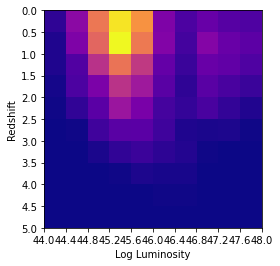

In [69]:
lum_range = [np.floor(min(lum))+(np.ceil(max(lum)-min(lum))/10)*i for i in range(11)]
z_range = [np.floor(min(z))+(np.ceil(max(z)-min(z))/10)*i for i in range(11)]

lum_z_num = np.zeros((10,10))

find_num_agn = """
SELECT COUNT(id) FROM agn_samp_z_5_area_10 where z BETWEEN (%s) AND (%s) and lum BETWEEN (%s) AND (%s);
"""

for i in range(len(lum_range)-1):
    for j in range(len(z_range)-1):
        val = (float(z_range[j]), float(z_range[j+1]), float(lum_range[i]), float(lum_range[i+1]))
        res = sql.read_query(connection, find_num_agn, val)
        lum_z_num[i, j] = res[0][0]

        
plt.imshow(lum_z_num,cmap="plasma")
plt.xlabel('Log Luminosity')
plt.ylabel('Redshift')
ticks = [i-0.5 for i in range(11)]
plt.xticks(ticks, lum_range)
plt.yticks(ticks, z_range)



Find the distribution of AGN that don't successfully recover the value of tau using JAVELIN

([<matplotlib.axis.YTick at 0x7f92d463c970>,
 [Text(0, -0.5, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.5, '1.0'),
  Text(0, 2.5, '1.5'),
  Text(0, 3.5, '2.0'),
  Text(0, 4.5, '2.5'),
  Text(0, 5.5, '3.0'),
  Text(0, 6.5, '3.5'),
  Text(0, 7.5, '4.0'),
  Text(0, 8.5, '4.5'),
  Text(0, 9.5, '5.0')])

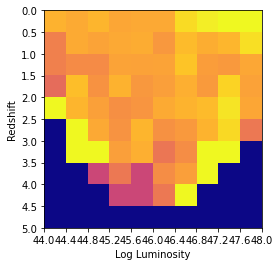

In [70]:
lum_z_tau = np.zeros((10,10))

find_num_agn = """
SELECT COUNT(agn_samp_z_5_area_10.id)
FROM agn_samp_z_5_area_10
INNER JOIN agn_DRW_z_5_area_10 ON agn_samp_z_5_area_10.id=agn_DRW_z_5_area_10.id
WHERE agn_DRW_z_5_area_10.mean_tau = 0 
AND agn_samp_z_5_area_10.z BETWEEN (%s) 
AND (%s) and agn_samp_z_5_area_10.lum BETWEEN (%s) AND (%s);
"""

for i in range(len(lum_range)-1):
    for j in range(len(z_range)-1):
        val = (float(z_range[j]), float(z_range[j+1]), float(lum_range[i]), float(lum_range[i+1]))
        res = sql.read_query(connection, find_num_agn, val)
        if lum_z_num[i,j] > 0:
            lum_z_tau[i, j] = res[0][0]/lum_z_num[i,j]

plt.imshow(lum_z_tau,cmap="plasma")
plt.xlabel('Log Luminosity')
plt.ylabel('Redshift')
ticks = [i-0.5 for i in range(11)]
plt.xticks(ticks, lum_range)
plt.yticks(ticks, z_range)

([<matplotlib.axis.YTick at 0x7f92cc1707f0>,
 [Text(0, -0.5, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.5, '1.0'),
  Text(0, 2.5, '1.5'),
  Text(0, 3.5, '2.0'),
  Text(0, 4.5, '2.5'),
  Text(0, 5.5, '3.0'),
  Text(0, 6.5, '3.5'),
  Text(0, 7.5, '4.0'),
  Text(0, 8.5, '4.5'),
  Text(0, 9.5, '5.0')])

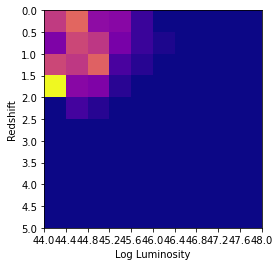

In [71]:
lum_z_tau = np.zeros((10,10))

find_num_agn = """
SELECT COUNT(agn_samp_z_5_area_10.id)
FROM agn_samp_z_5_area_10
INNER JOIN agn_DRW_z_5_area_10 ON agn_samp_z_5_area_10.id=agn_DRW_z_5_area_10.id
WHERE agn_DRW_z_5_area_10.tau BETWEEN agn_DRW_z_5_area_10.mean_tau - agn_DRW_z_5_area_10.std_tau AND agn_DRW_z_5_area_10.mean_tau + agn_DRW_z_5_area_10.std_tau
AND agn_samp_z_5_area_10.z BETWEEN (%s) 
AND (%s) and agn_samp_z_5_area_10.lum BETWEEN (%s) AND (%s);
"""

for i in range(len(lum_range)-1):
    for j in range(len(z_range)-1):
        val = (float(z_range[j]), float(z_range[j+1]), float(lum_range[i]), float(lum_range[i+1]))
        res = sql.read_query(connection, find_num_agn, val)
        if lum_z_num[i,j] > 0:
            lum_z_tau[i, j] = res[0][0]/lum_z_num[i,j]

plt.imshow(lum_z_tau,cmap="plasma")
plt.xlabel('Log Luminosity')
plt.ylabel('Redshift')
ticks = [i-0.5 for i in range(11)]
plt.xticks(ticks, lum_range)
plt.yticks(ticks, z_range)

([<matplotlib.axis.YTick at 0x7f92d3cc0700>,
 [Text(0, -0.5, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.5, '1.0'),
  Text(0, 2.5, '1.5'),
  Text(0, 3.5, '2.0'),
  Text(0, 4.5, '2.5'),
  Text(0, 5.5, '3.0'),
  Text(0, 6.5, '3.5'),
  Text(0, 7.5, '4.0'),
  Text(0, 8.5, '4.5'),
  Text(0, 9.5, '5.0')])

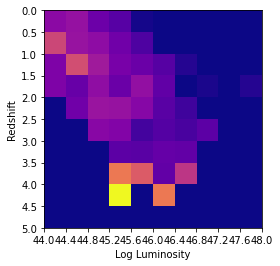

In [72]:
lum_z_sig = np.zeros((10,10))

find_num_agn = """
SELECT COUNT(agn_samp_z_5_area_10.id)
FROM agn_samp_z_5_area_10
INNER JOIN agn_DRW_z_5_area_10 ON agn_samp_z_5_area_10.id=agn_DRW_z_5_area_10.id
WHERE agn_DRW_z_5_area_10.sigma BETWEEN agn_DRW_z_5_area_10.mean_sig - agn_DRW_z_5_area_10.std_sig AND agn_DRW_z_5_area_10.mean_sig + agn_DRW_z_5_area_10.std_sig
AND agn_samp_z_5_area_10.z BETWEEN (%s) 
AND (%s) and agn_samp_z_5_area_10.lum BETWEEN (%s) AND (%s);
"""

for i in range(len(lum_range)-1):
    for j in range(len(z_range)-1):
        val = (float(z_range[j]), float(z_range[j+1]), float(lum_range[i]), float(lum_range[i+1]))
        res = sql.read_query(connection, find_num_agn, val)
        if lum_z_num[i,j] > 0:
            lum_z_tau[i, j] = res[0][0]/lum_z_num[i,j]

plt.imshow(lum_z_tau,cmap="plasma")
plt.xlabel('Log Luminosity')
plt.ylabel('Redshift')
ticks = [i-0.5 for i in range(11)]
plt.xticks(ticks, lum_range)
plt.yticks(ticks, z_range)
